## 自身で学習したモデルを保存する
まずはmnistのデータを読み込み、正規化しておきます。

In [ ]:
import tensorflow as tf
f_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = f_mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 1s 0us/step


CNNのモデルを作成します。

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

compile()によって訓練方法を設定します。

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

訓練します。

In [ ]:
import time

start = time.time()

train_hist=model.fit(training_images, training_labels, epochs=50, verbose=1,
                     validation_data=(test_images, test_labels), batch_size=128)

print(time.time() - start)

Epoch 1/50
469/469 [==============================] - 9s 8ms/step - loss: 0.7279 - accuracy: 0.7338 - val_loss: 0.4711 - val_accuracy: 0.8316
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4666 - accuracy: 0.8322 - val_loss: 0.4017 - val_accuracy: 0.8576
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.8524 - val_loss: 0.3652 - val_accuracy: 0.8681
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3850 - accuracy: 0.8609 - val_loss: 0.3504 - val_accuracy: 0.8744
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3611 - accuracy: 0.8699 - val_loss: 0.3348 - val_accuracy: 0.8797
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3494 - accuracy: 0.8752 - val_loss: 0.3238 - val_accuracy: 0.8816
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3412 - accuracy: 0.8776 - val_loss: 0.3057 - val_accuracy: 0.8907
Epoch 

学習曲線をプロットします。

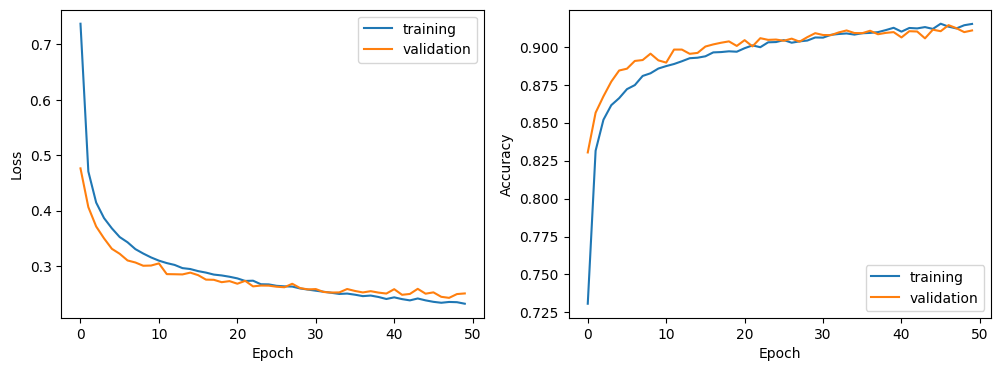

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
figs, axs=plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(train_hist.history['loss'], label='training')
axs[0].plot(train_hist.history['val_loss'], label='validation')
axs[0].legend()
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[1].plot(train_hist.history['accuracy'], label='training')
axs[1].plot(train_hist.history['val_accuracy'], label='validation')
axs[1].legend()
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
plt.show()

最終的な検証用の損失と精度を数値で確認しておきます。

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2505 - accuracy: 0.9108


[0.25046977400779724, 0.9107999801635742]

## モデルの保存
学習済みモデルをファイルに保存します。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/my_fashion_mnist_model')

H5形式でも保存してみます。

In [ ]:
model.save('/content/drive/MyDrive/my_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Google Driveを開き、モデルが保存されていることを確認しておきましょう。